In [3]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Files for Acquiring and Preparation
import acquire

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
%%time

# Acquire the training dataset
df_train = acquire.load_jane_street_train()

# Print the concise summary of df_train
df_train.info()

# Print the dimensionality of the df_train
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float32(135), int32(3)
memory usage: 1.2 GB
CPU times: user 54.1 s, sys: 14.2 s, total: 1min 8s
Wall time: 1min 13s


(2390491, 138)

**Takeaways**
1. All the values in the dataframe are numeric.
2. The dataframe contains more than 2 million records and 138 columns.

In [26]:
%%time

# Detect and count missing values in columns
nulls_in_cols = df_train.isnull().sum(axis=0)

# Converted to pandas dataframe
nulls_in_cols = pd.DataFrame(nulls_in_cols, columns=['counts'])

# Create a mask when a column has missing values
mask = (nulls_in_cols['counts'] !=0)

# Return the columns that contains missing values
nulls_in_cols = nulls_in_cols[mask]

# Add a column for the percent of the missing values
nulls_in_cols['percent'] = round(nulls_in_cols.counts/df_train.shape[0], 3)

# Order the columns in decending order based on the percent
nulls_in_cols.sort_values(by='percent', ascending=False, inplace=True)
nulls_in_cols

CPU times: user 438 ms, sys: 111 ms, total: 549 ms
Wall time: 548 ms


,counts,percent
feature_28,395535,0.165
feature_18,395535,0.165
feature_17,395535,0.165
feature_27,395535,0.165
feature_7,393135,0.164
...,...,...
feature_73,788,0.000
feature_4,448,0.000
feature_85,788,0.000
feature_91,788,0.000


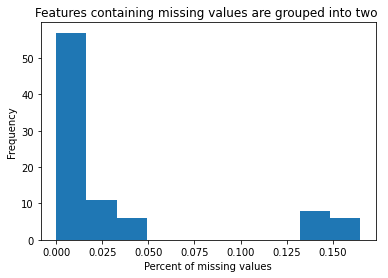

In [33]:
# Plot the distribution of the features 
nulls_in_cols.percent.plot(kind='hist')
plt.title("Features containing missing values are grouped into two ")
plt.xlabel("Percent of missing values")
plt.show()